<a href="https://colab.research.google.com/github/raghavanpartha/FirstApp/blob/main/CNN_Lung_infection_prediction_raj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [172]:
# Ensure GPU is selected
# Runtime > Change Runtime > From Dropdown select GPU 

In [173]:
# Create a Classification model that can predict whether the given image is a dog or cat

In [174]:
#For Colab users, once the zip file is uploaded, extract the same
! unzip data_Lungs.zip

Archive:  data_Lungs.zip
replace __MACOSX/._data_Lungs? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._data_Lungs   
  inflating: data_Lungs/.DS_Store    
  inflating: __MACOSX/data_Lungs/._test  
  inflating: __MACOSX/data_Lungs/._train  
  inflating: __MACOSX/data_Lungs/test/._Type 1 disease  
  inflating: data_Lungs/test/.DS_Store  
  inflating: __MACOSX/data_Lungs/test/._healthy  
  inflating: __MACOSX/data_Lungs/test/._Type 2 disease  
  inflating: __MACOSX/data_Lungs/train/._Type 1 disease  
  inflating: data_Lungs/train/.DS_Store  
  inflating: __MACOSX/data_Lungs/train/._healthy  
  inflating: __MACOSX/data_Lungs/train/._Type 2 disease  
  inflating: data_Lungs/test/Type 1 disease/radiopaedia-2019-novel-coronavirus-infected-pneumonia.jpg  
  inflating: data_Lungs/test/Type 1 disease/COVID-00012.jpg  
  inflating: data_Lungs/test/Type 1 disease/0105.png  
  inflating: data_Lungs/test/Type 1 disease/0111.jpg  
  inflating: data_Lungs/test/Type 1 disease/0112.jpg 

In [175]:
import tensorflow as tf

In [176]:
#Preprocessing --- Goal to make the data compatible for CNN input
# In tensorflow, you can achieve the same using ImageGenerators


train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)
test_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale= 1.0/255.)

In [177]:
#Pass the images through the generator

trainImageData = train_generator.flow_from_directory("data_Lungs/train/",
                                                     batch_size=16, #how much images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 


testImageData = train_generator.flow_from_directory("data_Lungs/test/",
                                                     batch_size=16, #how much images to give per iteration in an epoch
                                                     class_mode="categorical", #Incase of multi-class classification, "categorical"
                                                     target_size=(48,48) #Ensures all images are of same size (resizing)
                                                     ) 

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [178]:
#Given dataset is a balanced dataset !!!

trainImageData.class_indices

{'Type 1 disease': 0, 'Type 2 disease': 1, 'healthy': 2}

In [179]:
#Given dataset is a balanced dataset !!!

testImageData.class_indices

{'Type 1 disease': 0, 'Type 2 disease': 1, 'healthy': 2}

In [180]:
trainImageData.filenames

['Type 1 disease/01.jpeg',
 'Type 1 disease/010.png',
 'Type 1 disease/012.jpeg',
 'Type 1 disease/015.jpg',
 'Type 1 disease/019.png',
 'Type 1 disease/02.jpeg',
 'Type 1 disease/020.jpg',
 'Type 1 disease/021.jpeg',
 'Type 1 disease/022.jpeg',
 'Type 1 disease/024.jpeg',
 'Type 1 disease/025.jpeg',
 'Type 1 disease/026.jpeg',
 'Type 1 disease/027.jpeg',
 'Type 1 disease/03.jpeg',
 'Type 1 disease/031.jpeg',
 'Type 1 disease/032.jpeg',
 'Type 1 disease/033.png',
 'Type 1 disease/039.jpeg',
 'Type 1 disease/04.png',
 'Type 1 disease/040.jpeg',
 'Type 1 disease/041.jpeg',
 'Type 1 disease/042.jpeg',
 'Type 1 disease/043.jpeg',
 'Type 1 disease/044.jpeg',
 'Type 1 disease/045.jpeg',
 'Type 1 disease/046.jpeg',
 'Type 1 disease/047.jpeg',
 'Type 1 disease/048.jpeg',
 'Type 1 disease/049.jpeg',
 'Type 1 disease/050.jpeg',
 'Type 1 disease/051.jpeg',
 'Type 1 disease/052.jpeg',
 'Type 1 disease/053.jpeg',
 'Type 1 disease/054.jpeg',
 'Type 1 disease/055.jpeg',
 'Type 1 disease/056.jpg',
 'T

In [181]:
testImageData.filenames

['Type 1 disease/0100.jpeg',
 'Type 1 disease/0102.jpeg',
 'Type 1 disease/0105.png',
 'Type 1 disease/0106.jpeg',
 'Type 1 disease/0108.jpeg',
 'Type 1 disease/0111.jpg',
 'Type 1 disease/0112.jpg',
 'Type 1 disease/0113.jpg',
 'Type 1 disease/0115.jpeg',
 'Type 1 disease/0118.jpeg',
 'Type 1 disease/0119.jpeg',
 'Type 1 disease/0120.jpg',
 'Type 1 disease/094.png',
 'Type 1 disease/096.png',
 'Type 1 disease/098.jpeg',
 'Type 1 disease/COVID-00003b.jpg',
 'Type 1 disease/COVID-00012.jpg',
 'Type 1 disease/COVID-00022.jpg',
 'Type 1 disease/COVID-00033.jpg',
 'Type 1 disease/COVID-00037.jpg',
 'Type 1 disease/auntminnie-2020_01_31_20_24_2322_2020_01_31_x-ray_coronavirus_US.jpg',
 'Type 1 disease/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Type 1 disease/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Type 1 disease/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg',
 'Type 1 disease/auntminnie-d-2020_01_28_

In [182]:
trainImageData.image_shape

(48, 48, 3)

In [183]:
testImageData.image_shape

(48, 48, 3)

In [184]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


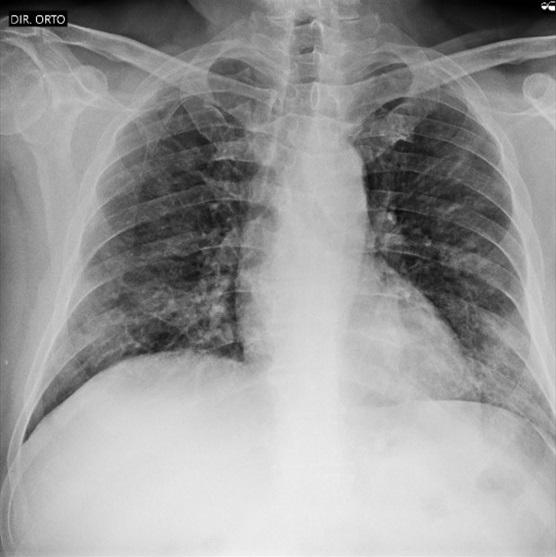

In [185]:
import cv2
import numpy as np

from google.colab.patches import cv2_imshow
img = cv2.imread('COVID-00012.jpg')
cv2_imshow(img)

#import matplotlib.image as mpimg 
#from matplotlib.pyplot import imshow
#%matplotlib inline
#testim = mpimg.imread('COVID-00012.jpg')
#imshow(testim)

#while True:
#    k = cv2_imshow.waitKey(0) & 0xFF     
#    if k == 27: break             # ESC key to exit
#cv2_imshow.destroyAllWindows()

In [186]:
# ARchitect the model

model = tf.keras.models.Sequential()

#Convolution Layer
#================================================================================================================================================
#First Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(32 , (3,3) , input_shape= trainImageData.image_shape , activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#Second Convolution Layer

#Conv2D(noFeatureMap, kernelShape, inputShape, activation, padding) Here same means add one pad layer

model.add(tf.keras.layers.Conv2D(16 , (3,3), activation= 'relu' , padding='same' )) #Convolve
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2))) #Pooling 

#=================================================================================================================================================
# Flatten

model.add(tf.keras.layers.Flatten())

#=================================================================================================================================================
# ANN
model.add(tf.keras.layers.Dense(units= 4096 , activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 1024, activation="relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(units= 256, activation="relu"))
model.add(tf.keras.layers.Dense(units= 3 , activation="softmax"))
#model.add(tf.keras.layers.Dense(units= 2 , activation="softmax"))

In [187]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 16)        4624      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 flatten_6 (Flatten)         (None, 2304)              0         
                                                                 
 dense_15 (Dense)            (None, 4096)             

In [188]:
#Compile

model.compile(optimizer="rmsprop",
              loss="categorical_crossentropy", #For multi-class classification: categorical_crossentropy | sparse_categorical_crossentropy
              metrics=['accuracy'])

In [189]:
len(trainImageData.filenames) // trainImageData.batch_size

15

In [190]:
#Callbacks

# How to stop the training process if my model has converged successfully?
# Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if testScore > trainScore and testScore >= self.cl and epoch > 10:
      self.model.stop_training=True

In [191]:
# Fit the model
# batch_size=32
# model.fit(trainImageData,
#          validation_data=testImageData,
#          epochs=10,
#          steps_per_epoch = len(trainImageData.filenames) // trainImageData.batch_size, #For training
#          validation_steps= len(testImageData.filenames) // testImageData.batch_size) #For testing

In [192]:
# Fit the model
# batch_size=32
history = model.fit(trainImageData,
                    validation_data=testImageData,
                    epochs=50,
                    steps_per_epoch=len(trainImageData.filenames) // trainImageData.batch_size, #For training
                    validation_steps=len(testImageData.filenames) // testImageData.batch_size, #For testing
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/50
15/15 [==============================] - 22s 1s/step - loss: 4.2835 - accuracy: 0.4681 - val_loss: 0.9838 - val_accuracy: 0.5000
Epoch 2/50
15/15 [==============================] - 14s 929ms/step - loss: 0.8866 - accuracy: 0.6681 - val_loss: 1.5549 - val_accuracy: 0.2656
Epoch 3/50
15/15 [==============================] - 14s 920ms/step - loss: 0.7088 - accuracy: 0.7362 - val_loss: 1.1233 - val_accuracy: 0.6094
Epoch 4/50
15/15 [==============================] - 14s 945ms/step - loss: 0.5411 - accuracy: 0.7872 - val_loss: 0.5351 - val_accuracy: 0.8125
Epoch 5/50
15/15 [==============================] - 14s 938ms/step - loss: 0.3627 - accuracy: 0.8681 - val_loss: 1.1346 - val_accuracy: 0.6406
Epoch 6/50
15/15 [==============================] - 15s 1s/step - loss: 0.4356 - accuracy: 0.8596 - val_loss: 0.3965 - val_accuracy: 0.9062
Epoch 7/50
15/15 [==============================] - 14s 926ms/step - loss: 0.2324 - accuracy: 0.9149 - val_loss: 0.7893 - val_accuracy: 0.7188
Epoch

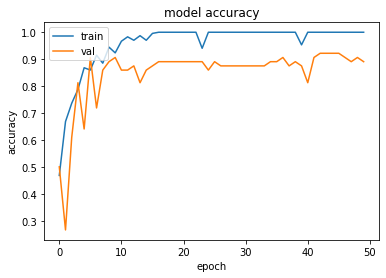

In [193]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

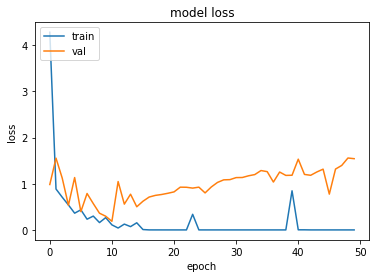

In [194]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [195]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [196]:
#Prediction
# model
#Load an Image
imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
print(prediction)

[[1. 0. 0.]]


In [197]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/255.,
                                                                  rotation_range=90,
                                                                  zoom_range=0.2,
                                                                  horizontal_flip=True,
                                                                  vertical_flip=True)


In [198]:
#Callbacks

# How to stop the training process if my model has converged successfully?
# Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if testScore > trainScore and testScore >= self.cl and epoch > 10:
      self.model.stop_training=True

In [199]:
# Fit the model after augmentation

history = model.fit(trainImageData,
                    validation_data=testImageData,
                    epochs=50,
                    steps_per_epoch=len(trainImageData.filenames) // trainImageData.batch_size, #For training
                    validation_steps=len(testImageData.filenames) // testImageData.batch_size, #For testing
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/50
15/15 [==============================] - 15s 1s/step - loss: 1.8617e-07 - accuracy: 1.0000 - val_loss: 1.5240 - val_accuracy: 0.8906
Epoch 2/50
15/15 [==============================] - 14s 919ms/step - loss: 4.5655e-08 - accuracy: 1.0000 - val_loss: 1.4960 - val_accuracy: 0.9062
Epoch 3/50
15/15 [==============================] - 14s 915ms/step - loss: 1.9276e-08 - accuracy: 1.0000 - val_loss: 1.5662 - val_accuracy: 0.9219
Epoch 4/50
15/15 [==============================] - 14s 915ms/step - loss: 2.4349e-08 - accuracy: 1.0000 - val_loss: 1.4871 - val_accuracy: 0.9062
Epoch 5/50
15/15 [==============================] - 14s 928ms/step - loss: 0.2300 - accuracy: 0.9702 - val_loss: 12.0054 - val_accuracy: 0.5938
Epoch 6/50
15/15 [==============================] - 14s 914ms/step - loss: 0.4136 - accuracy: 0.9787 - val_loss: 2.1098 - val_accuracy: 0.8750
Epoch 7/50
15/15 [==============================] - 17s 1s/step - loss: 0.0129 - accuracy: 0.9915 - val_loss: 1.8019 - val_accur

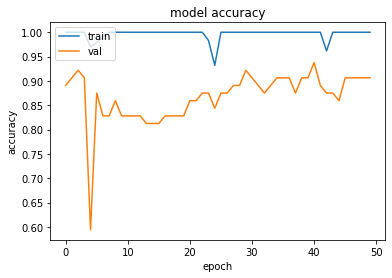

In [200]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

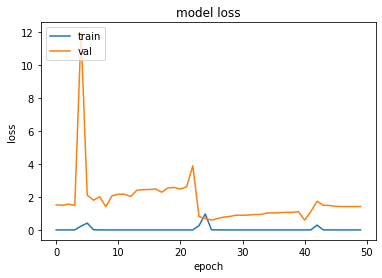

In [201]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [202]:
#Prediction
# model
#Load an Image
imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
print(prediction)

[[1. 0. 0.]]


In [203]:
#Saving Model
model.save("LungsDiseaseDetector")

INFO:tensorflow:Assets written to: LungsDiseaseDetector/assets


INFO:tensorflow:Assets written to: LungsDiseaseDetector/assets


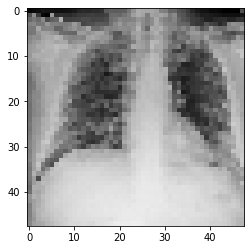

In [204]:
#Deployment Example
#Step1: Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
plt.imshow(imageToPredict)

In [205]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)

myImageNPArray.shape

(48, 48, 3)

In [206]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 48, 48, 3)

In [207]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)

In [208]:
prediction

array([[1., 0., 0.]], dtype=float32)

In [209]:
list(trainImageData.class_indices)[np.argmax(prediction)]

'Type 1 disease'

In [210]:
# Part#2 - Transfer learning using mobile net:

In [211]:
import tensorflow as tf
from glob import glob

In [212]:
# Set the training path and validation path

train_path = 'data_Lungs/train/'
validation_path = 'data_Lungs/test/'

In [213]:
#Initialize Glob to interact with storage

image_files = glob(train_path +'/*/*.jp*g')
valid_image_files = glob(validation_path +'/*/*.jp*g')

In [214]:
#Step1: Create ImageGenerator object (Use Algo's preprocessing function)

gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input,
                                                      rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

gen2 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input)

In [215]:
#Step2: Create Train and Valid Obj

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[48,48],
                                          class_mode='categorical',
                                          batch_size=16)

valid_generator = gen2.flow_from_directory(validation_path,
                                          target_size=[48,48],
                                          class_mode='categorical',
                                          batch_size=16)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [216]:
#Step3: Load the model with Training Enabled ! ---> 
# include_top = False will remove FC layer from existing arch


mobnet = tf.keras.applications.mobilenet.MobileNet(input_shape=[48,48,3],
                                        weights="imagenet",
                                        include_top=False)

#Following Method 1, that will lock weights of CNN layer

for layer in mobnet.layers:
  layer.trainable=False #If Approach 1--- True else False

In [217]:
#Step4: Create FC layer

#Flatten

flatten = tf.keras.layers.Flatten()

# You can create your hidden layers here
#hLayer1 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer2 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer3 = tf.keras.layers.Dense(4000,activation="relu")

# Output Layer


finalLayer = tf.keras.layers.Dense(3,activation="softmax")

In [218]:
#Create Final Model

model = tf.keras.models.Sequential([
                                    mobnet,
                                    flatten,
                                    finalLayer
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 1, 1, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 1024)              0         
                                                                 
 dense_19 (Dense)            (None, 3)                 3075      
                                                                 
Total params: 3,231,939
Trainable params: 3,075
Non-trainable params: 3,228,864
_________________________________________________________________


In [219]:
mobnet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 conv1 (Conv2D)              (None, 24, 24, 32)        864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 24, 24, 32)       128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 24, 24, 32)        0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 24, 24, 32)       288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 24, 24, 32)       128       
 ation)                                         

In [220]:
#Compile

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [221]:
# Callbacks Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if testScore > trainScore and testScore >= self.cl and epoch > 2:
      self.model.stop_training=True

In [222]:
#Fit Model 
batch_size=16
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=10,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/10
15/15 [==============================] - 15s 892ms/step - loss: 1.1323 - accuracy: 0.2851 - val_loss: 1.1207 - val_accuracy: 0.3281
Epoch 2/10
15/15 [==============================] - 13s 899ms/step - loss: 1.1113 - accuracy: 0.3404 - val_loss: 1.1073 - val_accuracy: 0.3906
Epoch 3/10
15/15 [==============================] - 13s 847ms/step - loss: 1.1031 - accuracy: 0.3957 - val_loss: 1.1045 - val_accuracy: 0.4219
Epoch 4/10
15/15 [==============================] - 12s 832ms/step - loss: 1.0930 - accuracy: 0.4596 - val_loss: 1.0941 - val_accuracy: 0.3906
Epoch 5/10
15/15 [==============================] - 13s 857ms/step - loss: 1.0823 - accuracy: 0.4750 - val_loss: 1.0937 - val_accuracy: 0.4219
Epoch 6/10
15/15 [==============================] - 12s 843ms/step - loss: 1.0745 - accuracy: 0.4468 - val_loss: 1.0880 - val_accuracy: 0.4219
Epoch 7/10
15/15 [==============================] - 13s 839ms/step - loss: 1.0679 - accuracy: 0.4638 - val_loss: 1.0810 - val_accuracy: 0.4219

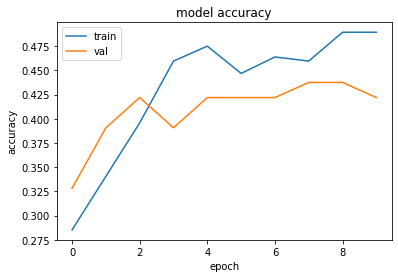

In [223]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

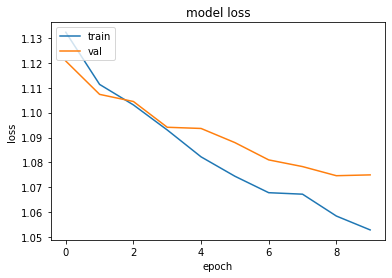

In [224]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [225]:
#Saving Model
model.save("LungsDetectorMobileNet")

INFO:tensorflow:Assets written to: LungsDetectorMobileNet/assets


INFO:tensorflow:Assets written to: LungsDetectorMobileNet/assets


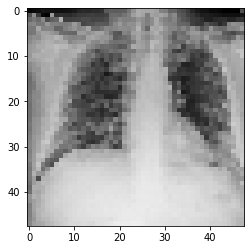

In [226]:
#Step1 - Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(48, 48))
plt.imshow(imageToPredict)

In [227]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
myImageNPArray.shape

(48, 48, 3)

In [228]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

(1, 48, 48, 3)

In [229]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
prediction

array([[0.41762567, 0.29843387, 0.28394043]], dtype=float32)

In [230]:
list(train_generator.class_indices)[np.argmax(prediction)]

'Type 1 disease'

In [231]:
# Part#3 - Transfer learning using Densenet:

In [232]:
#Step1: Create ImageGenerator object (Use Algo's preprocessing function)

gen = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input,
                                                      rotation_range=20,
                                                      shear_range=0.1,
                                                      zoom_range=0.2,
                                                      horizontal_flip=True,
                                                      vertical_flip=True)

gen2 = tf.keras.preprocessing.image.ImageDataGenerator(preprocessing_function=tf.keras.applications.densenet.preprocess_input)

In [233]:
#Step2: Create Train and Valid Obj

train_generator = gen.flow_from_directory(train_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=7)

valid_generator = gen2.flow_from_directory(validation_path,
                                          target_size=[224,224],
                                          class_mode='categorical',
                                          batch_size=7)

Found 251 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [235]:
#Step3: Load the model with Training Enabled ! ---> 
# include_top = False will remove FC layer from existing arch


densnet = tf.keras.applications.densenet.DenseNet121(input_shape=[224,224,3],
                                        weights="imagenet",
                                        include_top=False)

#Following Method 1, that will lock weights of CNN layer

for layer in densnet.layers:
  layer.trainable=False #If Approach 1--- True else False

In [239]:
#Step4: Create FC layer

#Flatten

flatten = tf.keras.layers.Flatten()

# You can create your hidden layers here
#hLayer1 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer2 = tf.keras.layers.Dense(4000,activation="relu")
#hLayer3 = tf.keras.layers.Dense(4000,activation="relu")

# Output Layer


finalLayer = tf.keras.layers.Dense(3,activation="softmax")

In [237]:
#Create Final Model

model = tf.keras.models.Sequential([
                                    densnet,
                                    flatten,
                                    finalLayer
])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 densenet121 (Functional)    (None, 7, 7, 1024)        7037504   
                                                                 
 flatten_8 (Flatten)         (None, 50176)             0         
                                                                 
 dense_20 (Dense)            (None, 3)                 150531    
                                                                 
Total params: 7,188,035
Trainable params: 150,531
Non-trainable params: 7,037,504
_________________________________________________________________


In [238]:
densnet.summary()

Model: "densenet121"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 230, 230, 3)  0          ['input_5[0][0]']                
 D)                                                                                               
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d_2[0][0]']       
                                )                                                       

In [240]:
#Compile

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [241]:
# Callbacks Convergence Criteria:
# 1. Model must be a generalized model ( testScore > trainScore )
# 2. Model's Test Score >= CL
# Custom Callback which satisfies the above two criteria :)

class MyQualityThreshold(tf.keras.callbacks.Callback):
  def __init__(self,cl):
    super(MyQualityThreshold, self).__init__()
    self.cl = cl
  
  def on_epoch_end(self,epoch,logs=None):
    testScore = logs['val_accuracy']
    trainScore = logs['accuracy']
    #epoch=logs['']

    if testScore > trainScore and testScore >= self.cl and epoch > 15:
      self.model.stop_training=True

In [ ]:
#Fit Model 
batch_size=7
history = model.fit(train_generator,
                    validation_data=valid_generator,
                    epochs=15,
                    steps_per_epoch=len(train_generator.filenames) // batch_size,
                    validation_steps=len(valid_generator.filenames) // batch_size,
                    callbacks=[MyQualityThreshold(0.8)])

Epoch 1/15
35/35 [==============================] - 63s 2s/step - loss: 2.3315 - accuracy: 0.7500 - val_loss: 0.9729 - val_accuracy: 0.8413
Epoch 2/15
35/35 [==============================] - 53s 2s/step - loss: 1.2703 - accuracy: 0.8525 - val_loss: 3.0937 - val_accuracy: 0.6984
Epoch 3/15
35/35 [==============================] - 54s 2s/step - loss: 1.6259 - accuracy: 0.8689 - val_loss: 0.7032 - val_accuracy: 0.9048
Epoch 4/15
35/35 [==============================] - ETA: 0s - loss: 0.5783 - accuracy: 0.9139

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#Saving Model
model.save("LungsDetectorDenseNet")

In [ ]:
#Step1 - Load an Image
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

imageToPredict = tf.keras.preprocessing.image.load_img('COVID-00012.jpg', target_size=(224, 224))
plt.imshow(imageToPredict)

In [ ]:
#Step2: Convert image to np array 
myImageNPArray = tf.keras.preprocessing.image.img_to_array(imageToPredict)
myImageNPArray.shape

In [ ]:
# Step3: Make the image compatible for the model by adding n
myCompatibleImage = np.expand_dims(myImageNPArray, axis = 0)
myCompatibleImage.shape

In [ ]:
#Step4: Prediction
prediction = model.predict(myCompatibleImage)
prediction

In [ ]:
list(train_generator.class_indices)[np.argmax(prediction)]